In [1]:
# Seaborn visualization library
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame
import os

### File Path

In [2]:
plot_file_path="../plotImages/"

plot_data_path="../plotData/"

### Specify PlotID

In [3]:
plotId = 1

In [4]:
#Plot the dataframe with the gas flux and the met data  - pairplot to see the correlation between the flux and the different met parameters

#Radiation Parameters
data_allplots_metA = read_excel('../PlotData/Met_GasFluxData_AllPlots.xlsx', sheet_name='Sheet1') #index_col=13, parse_dates=[13]  
data_allplots_metA.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data_allplots_metA['Flux'].max()

#data_allplots_metA.columns
data_allplots_metA.drop('TIMESTAMP_1_value', axis=1, inplace=True)
data_allplots_metA.set_index('TIMESTAMP_1_rounded', inplace=True)
data_allplots_metA

,Flux,ghg,flux_unit,Plot_ID,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,...,TDT2_Ts_1_1_1,TDT3_Ts_1_1_1,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1
TIMESTAMP_1_rounded,,,,,,,,,,,,,,,,,,,,,
2019-03-26 17:30:00,30.5901,N2O_dry,mug,2,277.5,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,-62.9864,N2O_dry,mug,3,277.5,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,78.1063,N2O_dry,mug,2,277.5,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,-144.0262,N2O_dry,mug,1,277.5,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,-98.0357,CH4_dry,mug,2,277.5,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29 18:30:00,-71.4157,CH4_dry,mug,10,452.6,193.10,50.435,380.05,465.70,57.015,...,20.10,23.20,23.85,12.8,19.30,20.65,25.35,-9999,100.0,-9999
2019-06-29 18:30:00,1259.1630,CO2_dry,mg,7,452.6,193.10,50.435,380.05,465.70,57.015,...,20.10,23.20,23.85,12.8,19.30,20.65,25.35,-9999,100.0,-9999
2019-06-29 18:30:00,1499.6100,CO2_dry,mg,8,452.6,193.10,50.435,380.05,465.70,57.015,...,20.10,23.20,23.85,12.8,19.30,20.65,25.35,-9999,100.0,-9999


### Filter the data by plot

In [6]:
data_anyplot_metA = data_allplots_metA[data_allplots_metA['Plot_ID'] == plotId]

#### Error when using hue on pairplot for Seaborn version 0.10.0
This works for Seaborn version 0.9.0
The problem is linked with statsmodel - seaborn fails to capture all runtime errors linked with statsmodel in this new version
https://github.com/mwaskom/seaborn/issues/1990
    


###### CORRELATION BETWEEN PLOT 1 FLUX DATA AND MET DATA - RADIATION PARAMETERS

(Photosynthetic photon flux density, Shortwave incoming radiation, Shortwave outgoing radiation, Longwave incoming radiation, Longwave outgoing radiation, Net radiation)

In [7]:
data_anyplot_metA

,Flux,ghg,flux_unit,Plot_ID,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,...,TDT2_Ts_1_1_1,TDT3_Ts_1_1_1,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1
TIMESTAMP_1_rounded,,,,,,,,,,,,,,,,,,,,,
2019-03-26 17:30:00,-144.0262,N2O_dry,mug,1,277.50,146.15,33.14,267.10,366.25,13.86,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,-98.0130,CH4_dry,mug,1,277.50,146.15,33.14,267.10,366.25,13.86,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-26 17:30:00,-466.8398,CO2_dry,mg,1,277.50,146.15,33.14,267.10,366.25,13.86,...,10.15,12.05,13.60,18.6,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-30 15:30:00,280.6187,N2O_dry,mug,1,641.10,284.85,57.88,293.60,395.00,125.57,...,11.00,14.00,17.00,18.3,25.65,27.55,32.95,-9999,100.0,-9999
2019-03-30 15:30:00,-59.4622,CH4_dry,mug,1,641.10,284.85,57.88,293.60,395.00,125.57,...,11.00,14.00,17.00,18.3,25.65,27.55,32.95,-9999,100.0,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29 13:30:00,-114.9512,CH4_dry,mug,1,1965.50,905.00,167.70,366.60,511.50,592.40,...,17.80,21.40,25.25,13.0,19.65,21.35,26.35,-9999,100.0,-9999
2019-06-29 13:30:00,412.6364,CO2_dry,mg,1,1965.50,905.00,167.70,366.60,511.50,592.40,...,17.80,21.40,25.25,13.0,19.65,21.35,26.35,-9999,100.0,-9999
2019-06-29 17:30:00,-125.4368,N2O_dry,mug,1,791.45,332.35,78.87,388.65,479.85,162.28,...,19.95,23.55,24.85,12.9,19.30,20.50,25.45,-9999,100.0,-9999


In [8]:
sns.set(color_codes=True)

### Functions to draw linear regression models - regplot, lmplot

##### CORRELATION BETWEEN A PARTICULAR PLOT FLUX DATA AND MET DATA - AIR PARAMETERS
(G_1_1_1 = Soil heat flux, G_2_1_1 = Soil heat flux, Ta_1_1_1 = Air temperature, RH_1_1_1 = Humidity, Pa_1_1_1 = Atmospheric Pressure, P_1_1_1 = Precipitation)

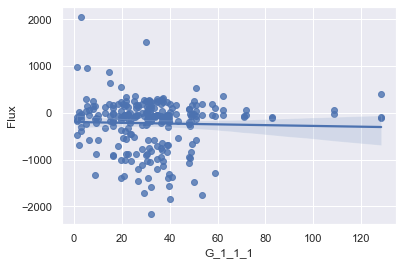

In [9]:
sns.regplot(x="G_1_1_1", y="Flux", data=data_anyplot_metA)

#### Plot - regplot - 
(G_1_1_1 = Soil heat flux, G_2_1_1 = Soil heat flux, Ta_1_1_1 = Air temperature, RH_1_1_1 = Humidity, Pa_1_1_1 = Atmospheric Pressure, P_1_1_1 = Precipitation)

#### Create directory for particular plot

In [10]:
# define the name of the directory to be created for the outputs 

path = "./VisualisationOutputs/LinearRegressionPlots/Plot"+str(plotId)

try:
    if not os.path.exists(path):     
         os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)


# define the name of the directory to be created for the png outputs

path_image = "../plotImages/Plot"+str(plotId)

try:
    if not os.path.exists(path):     
         os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path_image)
else:
    print ("Successfully created the directory %s " % path_image)

Successfully created the directory ./VisualisationOutputs/LinearRegressionPlots/Plot1 
Successfully created the directory ../plotImages/Plot1 


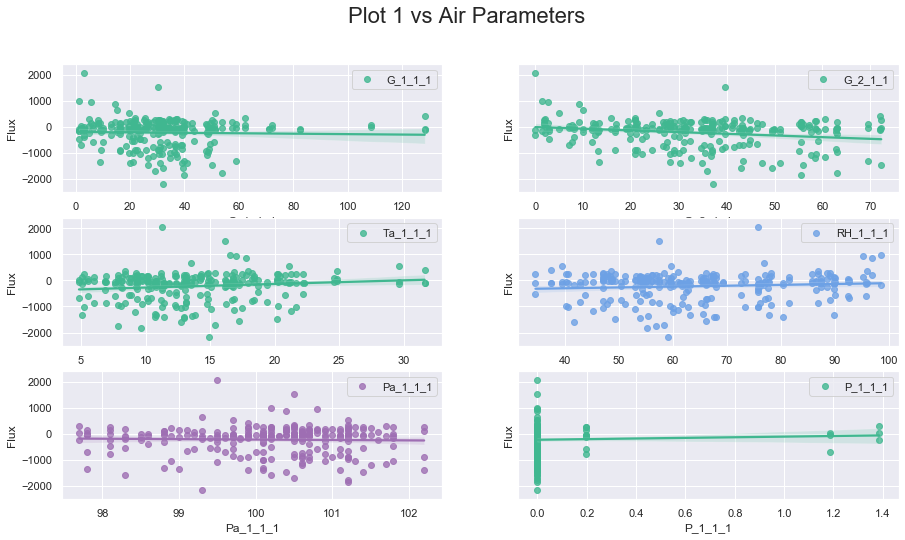

In [11]:
#plot the different data frames

fig, (axs) = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(15,8))
fig.suptitle("Plot "+str(plotId)+" vs Air Parameters", fontsize=22)

sns.regplot(x="G_1_1_1", y="Flux", data=data_anyplot_metA, ax=axs[0,0], label="G_1_1_1", color='#40B790')
sns.regplot(x="G_2_1_1", y="Flux", data=data_anyplot_metA, ax=axs[0,1], label="G_2_1_1", color="#40B790")

sns.regplot(x="Ta_1_1_1", y="Flux", data=data_anyplot_metA, ax=axs[1,0], label="Ta_1_1_1", color="#40B790")
sns.regplot(x="RH_1_1_1", y="Flux", data=data_anyplot_metA, ax=axs[1,1], label="RH_1_1_1", color="#6DA1E5")

sns.regplot(x="Pa_1_1_1", y="Flux", data=data_anyplot_metA, ax=axs[2,0], label="Pa_1_1_1", color="#9E6EB3")
sns.regplot(x="P_1_1_1", y="Flux", data=data_anyplot_metA, ax=axs[2,1], label="P_1_1_1", color="#40B790")

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()


#Save boxplot as a file
#output file name
output_file_name = "Plot"+str(plotId)+"_gasflux_AirMetData_regplot.png"
plot_file_name = path_image + output_file_name
# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

### Separate the gases

### N2O_dry

In [12]:
data_anyplot_metA_N2Odry = data_anyplot_metA[data_anyplot_metA['ghg'] == 'N2O_dry']

In [13]:
data_anyplot_metA_N2Odry

,Flux,ghg,flux_unit,Plot_ID,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,...,TDT2_Ts_1_1_1,TDT3_Ts_1_1_1,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1
TIMESTAMP_1_rounded,,,,,,,,,,,,,,,,,,,,,
2019-03-26 17:30:00,-144.0262,N2O_dry,mug,1,277.50,146.15,33.14,267.10,366.25,13.86,...,10.15,12.05,13.60,18.60,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-30 15:30:00,280.6187,N2O_dry,mug,1,641.10,284.85,57.88,293.60,395.00,125.57,...,11.00,14.00,17.00,18.30,25.65,27.55,32.95,-9999,100.0,-9999
2019-03-31 13:30:00,-154.8489,N2O_dry,mug,1,799.10,383.20,76.39,337.95,379.40,265.36,...,9.00,10.05,11.60,18.30,25.05,26.95,32.30,-9999,100.0,-9999
2019-04-01 14:00:00,123.3821,N2O_dry,mug,1,1378.50,676.40,142.05,269.90,404.75,399.50,...,9.20,12.50,17.40,18.60,23.60,25.75,31.40,-9999,100.0,-9999
2019-04-02 12:00:00,140.6737,N2O_dry,mug,1,551.45,264.05,52.42,324.60,351.30,184.93,...,7.90,7.40,7.90,18.80,23.90,27.75,35.40,-9999,83.9,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-27 09:30:00,77.3658,N2O_dry,mug,1,1622.00,732.60,147.45,306.15,418.05,473.25,...,14.90,15.25,16.05,13.90,21.25,23.70,31.15,-9999,86.0,-9999
2019-06-27 18:30:00,-91.3518,N2O_dry,mug,1,491.80,210.40,53.99,329.90,425.05,61.26,...,17.75,19.95,20.15,13.70,20.90,23.05,29.85,-9999,100.0,-9999
2019-06-28 16:00:00,55.7146,N2O_dry,mug,1,1368.00,617.10,136.85,338.50,459.90,358.85,...,17.70,21.05,23.65,13.35,20.35,21.50,28.05,-9999,100.0,-9999


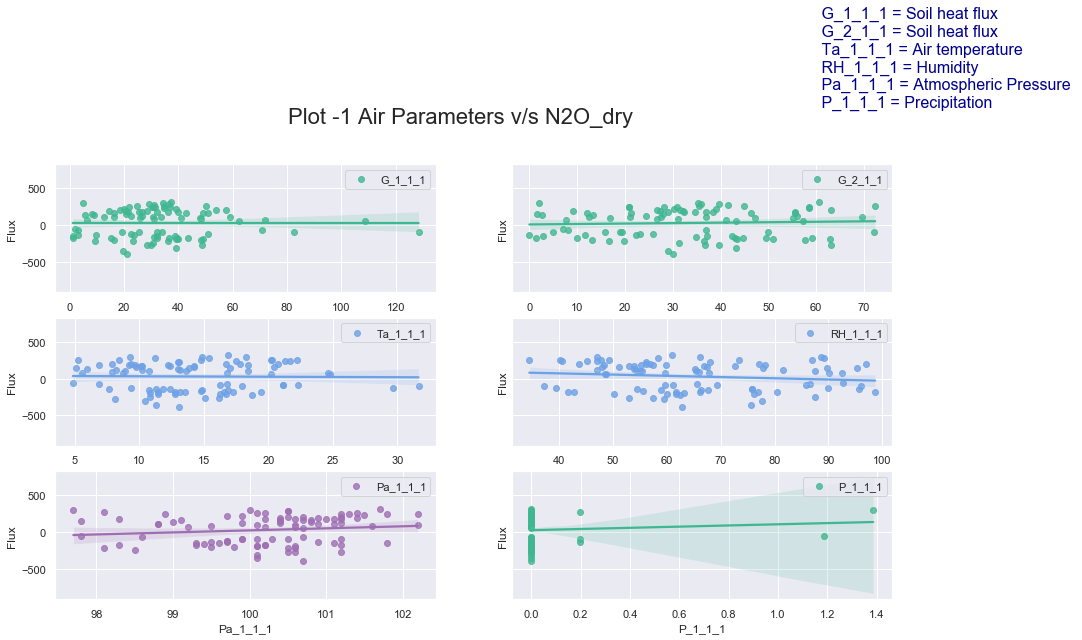

In [14]:
#plot the different data frames

fig, (axs) = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(15,8))
fig.suptitle("Plot -"+str(plotId)+" Air Parameters v/s N2O_dry", fontsize=22)

sns.regplot(x="G_1_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[0,0], label="G_1_1_1", color='#40B790')
sns.regplot(x="G_2_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[0,1], label="G_2_1_1", color="#40B790")

sns.regplot(x="Ta_1_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[1,0], label="Ta_1_1_1", color="#6DA1E5")
sns.regplot(x="RH_1_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[1,1], label="RH_1_1_1", color="#6DA1E5")

sns.regplot(x="Pa_1_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[2,0], label="Pa_1_1_1", color="#9E6EB3")
sns.regplot(x="P_1_1_1", y="Flux", data=data_anyplot_metA_N2Odry, ax=axs[2,1], label="P_1_1_1", color="#40B790")

fig.text(0.83, 0.98,' G_1_1_1 = Soil heat flux \n \
G_2_1_1 = Soil heat flux \n \
Ta_1_1_1 = Air temperature \n \
RH_1_1_1 = Humidity \n \
Pa_1_1_1 = Atmospheric Pressure \n \
P_1_1_1 = Precipitation', fontsize=16, color='darkblue'
)  

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()


#Save boxplot as a file
#output file name
output_file_name = "Plot"+str(plotId)+"_gasflux_N2Odry_AirMetData_regplot.png"
plot_file_name = path_image + output_file_name
# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

##### Note: N2O_dry - does not seem to have a linear relation with Air parameters

### CH4_dry

In [15]:
data_anyplot_metA_CH4dry = data_anyplot_metA[data_anyplot_metA['ghg'] == 'CH4_dry']

In [16]:
data_anyplot_metA_CH4dry

,Flux,ghg,flux_unit,Plot_ID,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,...,TDT2_Ts_1_1_1,TDT3_Ts_1_1_1,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1
TIMESTAMP_1_rounded,,,,,,,,,,,,,,,,,,,,,
2019-03-26 17:30:00,-98.0130,CH4_dry,mug,1,277.50,146.15,33.140,267.10,366.25,13.860,...,10.15,12.05,13.60,18.60,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-30 15:30:00,-59.4622,CH4_dry,mug,1,641.10,284.85,57.880,293.60,395.00,125.570,...,11.00,14.00,17.00,18.30,25.65,27.55,32.95,-9999,100.0,-9999
2019-03-31 13:30:00,-75.9083,CH4_dry,mug,1,799.10,383.20,76.390,337.95,379.40,265.360,...,9.00,10.05,11.60,18.30,25.05,26.95,32.30,-9999,100.0,-9999
2019-04-01 14:00:00,-41.9558,CH4_dry,mug,1,1378.50,676.40,142.050,269.90,404.75,399.500,...,9.20,12.50,17.40,18.60,23.60,25.75,31.40,-9999,100.0,-9999
2019-04-02 12:00:00,-123.7815,CH4_dry,mug,1,551.45,264.05,52.420,324.60,351.30,184.930,...,7.90,7.40,7.90,18.80,23.90,27.75,35.40,-9999,83.9,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24 08:30:00,-59.9537,CH4_dry,mug,1,350.85,152.70,33.610,378.80,414.30,83.590,...,15.20,15.80,16.25,14.30,21.55,22.70,26.10,-9999,100.0,-9999
2019-06-24 17:00:00,-50.5419,CH4_dry,mug,1,806.80,358.55,85.955,370.90,452.85,190.645,...,16.90,20.05,21.45,14.20,21.40,22.05,25.65,-9999,100.0,-9999
2019-06-28 16:00:00,-39.1071,CH4_dry,mug,1,1368.00,617.10,136.850,338.50,459.90,358.850,...,17.70,21.05,23.65,13.35,20.35,21.50,28.05,-9999,100.0,-9999


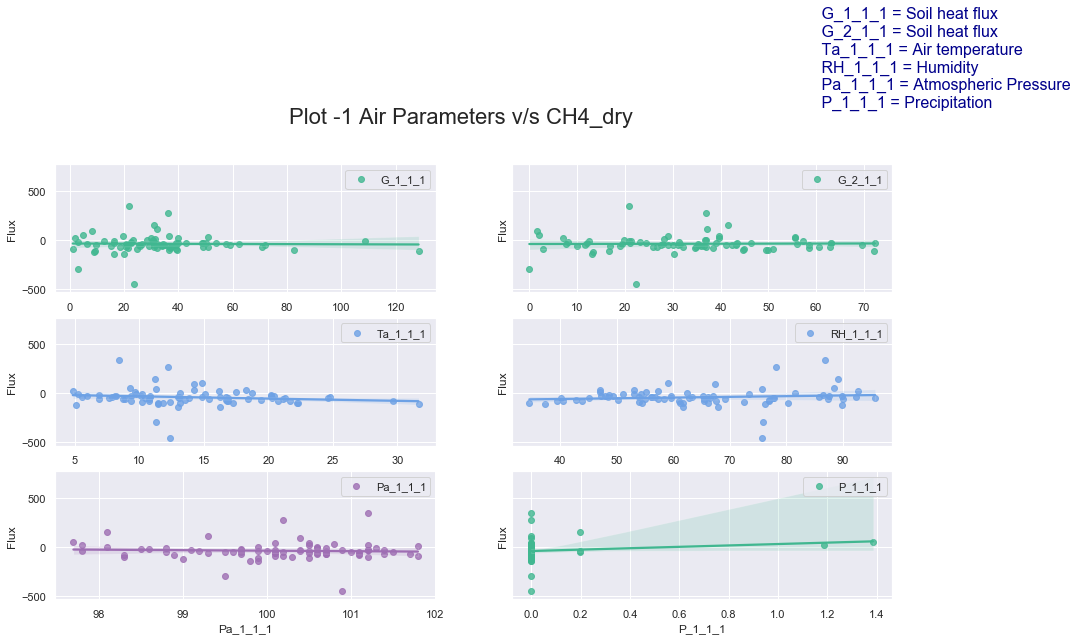

In [17]:
#plot the different data frames

fig, (axs) = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(15,8))
fig.suptitle("Plot -"+str(plotId)+" Air Parameters v/s CH4_dry", fontsize=22)

sns.regplot(x="G_1_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[0,0], label="G_1_1_1", color='#40B790')
sns.regplot(x="G_2_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[0,1], label="G_2_1_1", color="#40B790")

sns.regplot(x="Ta_1_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[1,0], label="Ta_1_1_1", color="#6DA1E5")
sns.regplot(x="RH_1_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[1,1], label="RH_1_1_1", color="#6DA1E5")

sns.regplot(x="Pa_1_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[2,0], label="Pa_1_1_1", color="#9E6EB3")
sns.regplot(x="P_1_1_1", y="Flux", data=data_anyplot_metA_CH4dry, ax=axs[2,1], label="P_1_1_1", color="#40B790")

fig.text(0.83, 0.98,' G_1_1_1 = Soil heat flux \n \
G_2_1_1 = Soil heat flux \n \
Ta_1_1_1 = Air temperature \n \
RH_1_1_1 = Humidity \n \
Pa_1_1_1 = Atmospheric Pressure \n \
P_1_1_1 = Precipitation', fontsize=16, color='darkblue'
)  

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()

#Save boxplot as a file
#output file name
output_file_name = "Plot"+str(plotId)+"_gasflux_CH4dry_AirMetData_regplot.png"
plot_file_name = path_image + output_file_name
# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

##### Note: There seems to be a linear relation between CH4_dry flux and Radiation parameters (except for precipitation)

### CO2_dry

In [18]:
data_anyplot_metA_CO2dry = data_anyplot_metA[data_anyplot_metA['ghg'] == 'CO2_dry']

In [19]:
data_anyplot_metA_CO2dry

,Flux,ghg,flux_unit,Plot_ID,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,...,TDT2_Ts_1_1_1,TDT3_Ts_1_1_1,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1
TIMESTAMP_1_rounded,,,,,,,,,,,,,,,,,,,,,
2019-03-26 17:30:00,-466.8398,CO2_dry,mg,1,277.50,146.15,33.14,267.10,366.25,13.86,...,10.15,12.05,13.60,18.60,27.75,30.25,36.05,-9999,100.0,-9999
2019-03-30 15:30:00,-1701.9439,CO2_dry,mg,1,641.10,284.85,57.88,293.60,395.00,125.57,...,11.00,14.00,17.00,18.30,25.65,27.55,32.95,-9999,100.0,-9999
2019-03-31 13:30:00,-1389.1798,CO2_dry,mg,1,799.10,383.20,76.39,337.95,379.40,265.36,...,9.00,10.05,11.60,18.30,25.05,26.95,32.30,-9999,100.0,-9999
2019-04-01 14:00:00,-1447.0002,CO2_dry,mg,1,1378.50,676.40,142.05,269.90,404.75,399.50,...,9.20,12.50,17.40,18.60,23.60,25.75,31.40,-9999,100.0,-9999
2019-04-02 12:00:00,-1335.3756,CO2_dry,mg,1,551.45,264.05,52.42,324.60,351.30,184.93,...,7.90,7.40,7.90,18.80,23.90,27.75,35.40,-9999,83.9,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-27 09:30:00,-236.1058,CO2_dry,mg,1,1622.00,732.60,147.45,306.15,418.05,473.25,...,14.90,15.25,16.05,13.90,21.25,23.70,31.15,-9999,86.0,-9999
2019-06-27 18:30:00,548.5857,CO2_dry,mg,1,491.80,210.40,53.99,329.90,425.05,61.26,...,17.75,19.95,20.15,13.70,20.90,23.05,29.85,-9999,100.0,-9999
2019-06-28 16:00:00,351.4631,CO2_dry,mg,1,1368.00,617.10,136.85,338.50,459.90,358.85,...,17.70,21.05,23.65,13.35,20.35,21.50,28.05,-9999,100.0,-9999


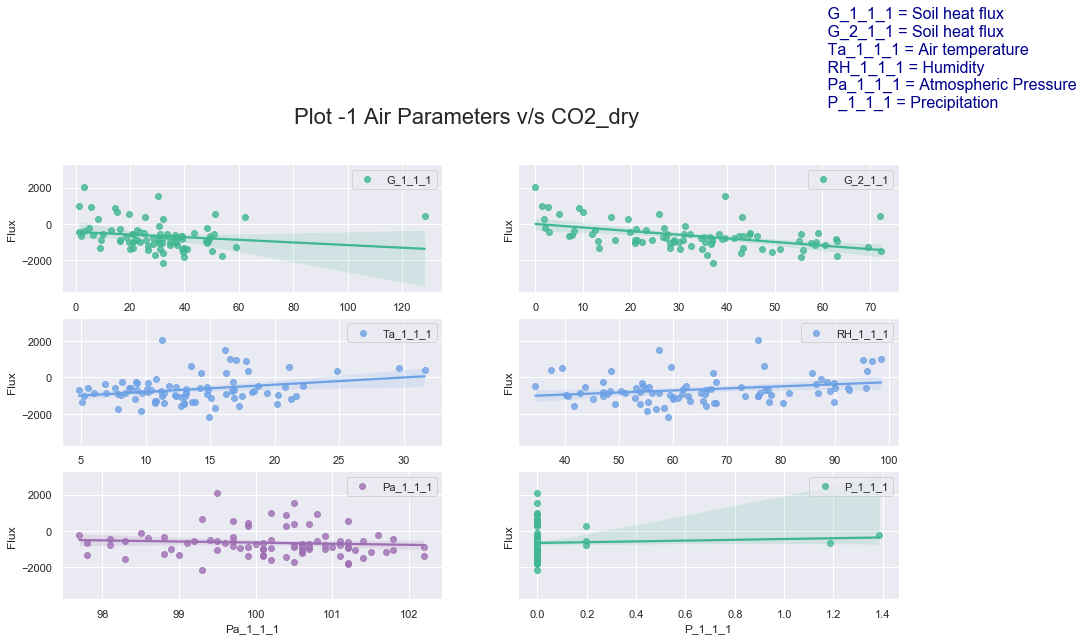

In [20]:
#plot the different data frames

fig, (axs) = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(15,8))
fig.suptitle("Plot -"+str(plotId)+" Air Parameters v/s CO2_dry", fontsize=22)

sns.regplot(x="G_1_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[0,0], label="G_1_1_1", color='#40B790')
sns.regplot(x="G_2_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[0,1], label="G_2_1_1", color="#40B790")

sns.regplot(x="Ta_1_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[1,0], label="Ta_1_1_1", color="#6DA1E5")
sns.regplot(x="RH_1_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[1,1], label="RH_1_1_1", color="#6DA1E5")

sns.regplot(x="Pa_1_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[2,0], label="Pa_1_1_1", color="#9E6EB3")
sns.regplot(x="P_1_1_1", y="Flux", data=data_anyplot_metA_CO2dry, ax=axs[2,1], label="P_1_1_1", color="#40B790")


fig.text(0.83, 0.98,' G_1_1_1 = Soil heat flux \n \
G_2_1_1 = Soil heat flux \n \
Ta_1_1_1 = Air temperature \n \
RH_1_1_1 = Humidity \n \
Pa_1_1_1 = Atmospheric Pressure \n \
P_1_1_1 = Precipitation', fontsize=16, color='darkblue'
)  

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()

#Save boxplot as a file
#output file name
output_file_name = "Plot"+str(plotId)+"_gasflux_CO2dry_AirMetData_regplot.png"
plot_file_name = path_image + output_file_name
# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

##### Note: There seems to be a linear relation between CO2_dry flux and air parameters (except for precipitation)